# Notebook for ML explainability 

This notebook serves as an aid for better understanding the "decision process" of the agent and visualize it.

In [1]:
import torch
import numpy as np
from utils.util import *
import matplotlib.pyplot as plt
from envs.snake import SnakeEnv
from agents.q_agent import *

In [2]:
action_to_direction = {
            0: 'right',
            1: 'down',
            2: 'left',
            3: 'up'
        }

In [3]:
def build_grid(observation, keep_target = False):
    head = observation["agent"]
    target = observation["target"]
    body = observation["body"]
    grid = np.full((10, 10), -1.0)
    grid[head[1], head[0]] += 2  if not any(np.array_equal(head , x) for x in body) else 0
    print()
    if np.all(head == target):
        if keep_target:
            grid[target[1], target[0]] += 3
    else:
        grid[target[1], target[0]] += 3

    for part in body:
        grid[part[1], part[0]] += 1    
    return grid

In [14]:
env = SnakeEnv('rgb_array', 10)
agent, _ = load_config_file(DQNAgent, '../configs/DQN-CNN-V1.yaml', '../saved_agent/', False)
observation,_,pixels = env.reset()
action = agent.select_action(observation)
grid = build_grid(observation)
tensor_grid = torch.from_numpy(grid).float()

In [43]:
observation, reward, target, terminated, info,pixels = env.step(action)
grid = build_grid(observation)
tensor_grid = torch.from_numpy(grid).float()
if target:
    env.eat_apple()

'left'

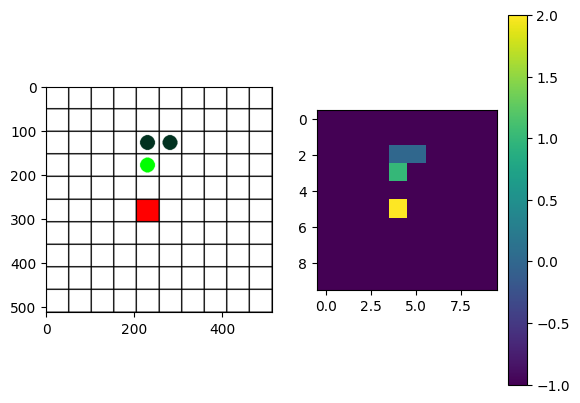

In [44]:
plt.subplot(1,2,1)
plt.imshow(pixels)
plt.subplot(1,2,2)
plt.imshow(grid);
plt.colorbar()
action = agent.select_action(observation)
action_to_direction[action]

In [10]:
head = observation['agent']
body = observation['body']
head, body, any(np.array_equal(head,x) for x in body)

(array([7, 3]),
 array([[7, 4],
        [7, 3]]),
 True)

In [23]:
any(np.array_equal([6,5], x) for x in [[6,5], [7,2]])

True